In [18]:
import pandas as pd
import tweepy
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content 

In [4]:
#Twitter API credentials
consumer_key = "1E8eY4bIE5VgTo3DWUgBQLoXf"
consumer_secret = "0Io9rJNDk6OuIdbuX5BTB4fiDgRCWkJH3YP15iQivvBuJUco4N"
access_key = "1301090680152883200-Cvzk4sBprcEkEnh0NuRX5DIHKoxf2f"
access_secret = "W0IYFVa6JlRix9ZAESEZUD2MNrJCcKfLHCchACgFPAoZF"

In [5]:
alltweets = []
def get_all_tweets(screen_name):
    auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)
    new_tweets = api.user_timeline(screen_name = screen_name, count=200)
    alltweets.extend(new_tweets)
    
    oldest = alltweets[-1].id - 1
    while len(new_tweets)>0:
        new_tweets = api.user_timeline(screen_name = screen_name, count=200,max_id=oldest)
        #save most recent tweets
        alltweets.extend(new_tweets)
        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        print ("...%s tweets downloaded so far" % (len(alltweets)))     
 
    outtweets = [[tweet.created_at,tweet.entities["hashtags"],tweet.entities["user_mentions"],tweet.favorite_count,
                  tweet.geo,tweet.id_str,tweet.lang,tweet.place,tweet.retweet_count,tweet.retweeted,tweet.source,tweet.text,
                  tweet._json["user"]["location"],tweet._json["user"]["name"],tweet._json["user"]["time_zone"],
                  tweet._json["user"]["utc_offset"]] for tweet in alltweets]
    

    tweets_df = pd.DataFrame(columns = ["time","hashtags","user_mentions","favorite_count",
                                    "geo","id_str","lang","place","retweet_count","retweeted","source",
                                    "text","location","name","time_zone","utc_offset"])
    tweets_df["time"]  = pd.Series([str(i[0]) for i in outtweets])
    tweets_df["hashtags"] = pd.Series([str(i[1]) for i in outtweets])
    tweets_df["user_mentions"] = pd.Series([str(i[2]) for i in outtweets])
    tweets_df["favorite_count"] = pd.Series([str(i[3]) for i in outtweets])
    tweets_df["geo"] = pd.Series([str(i[4]) for i in outtweets])
    tweets_df["id_str"] = pd.Series([str(i[5]) for i in outtweets])
    tweets_df["lang"] = pd.Series([str(i[6]) for i in outtweets])
    tweets_df["place"] = pd.Series([str(i[7]) for i in outtweets])
    tweets_df["retweet_count"] = pd.Series([str(i[8]) for i in outtweets])
    tweets_df["retweeted"] = pd.Series([str(i[9]) for i in outtweets])
    tweets_df["source"] = pd.Series([str(i[10]) for i in outtweets])
    tweets_df["text"] = pd.Series([str(i[11]) for i in outtweets])
    tweets_df["location"] = pd.Series([str(i[12]) for i in outtweets])
    tweets_df["name"] = pd.Series([str(i[13]) for i in outtweets])
    tweets_df["time_zone"] = pd.Series([str(i[14]) for i in outtweets])
    tweets_df["utc_offset"] = pd.Series([str(i[15]) for i in outtweets])
    tweets_df.to_csv(screen_name+"_tweets.csv")
    return tweets_df

In [6]:
tweet = get_all_tweets("imVkohli")

...400 tweets downloaded so far
...600 tweets downloaded so far
...800 tweets downloaded so far
...1000 tweets downloaded so far
...1200 tweets downloaded so far
...1400 tweets downloaded so far
...1600 tweets downloaded so far
...1800 tweets downloaded so far
...2000 tweets downloaded so far
...2200 tweets downloaded so far
...2351 tweets downloaded so far
...2351 tweets downloaded so far


In [7]:
tweet.head()

,time,hashtags,user_mentions,favorite_count,geo,id_str,lang,place,retweet_count,retweeted,source,text,location,name,time_zone,utc_offset
0,2021-03-18 18:44:44,[],[],146009,None,1372619998158458880,en,None,9735,False,Twitter for Android,And the hard work continues 💪🇮🇳 https://t.co/p...,,Virat Kohli,None,None
1,2021-03-14 18:06:53,[],[],235833,None,1371160922396323845,en,None,14611,False,Twitter for Android,Top game for us 👍 https://t.co/wpY25XEMAf,,Virat Kohli,None,None
2,2021-03-11 05:35:30,[],[],153918,None,1369884665658572800,en,None,8073,False,Twitter for Android,"New week, new format, same mission. Let's get ...",,Virat Kohli,None,None
3,2021-03-08 05:58:47,[],[],171447,None,1368803364037795840,en,None,9596,False,Twitter for Android,Happy Women's Day to all the amazing women of ...,,Virat Kohli,None,None
4,2021-03-07 11:07:16,[],"[{'screen_name': 'ivivianrichards', 'name': 'S...",155582,None,1368518607676735491,en,None,7278,False,Twitter for Android,Happy birthday to the greatest ever. The fearl...,,Virat Kohli,None,None


In [8]:
tweet1=tweet.text
tweet_string = " ".join(tweet1)

In [12]:
# Removing unwanted symbols incase if exists
tweet_string = re.sub("[^A-Za-z" "]+"," ",tweet_string).lower()
tweet_string = re.sub("[0-9" "]+"," ",tweet_string)

In [15]:
tweet_words = tweet_string.split(" ")
print(tweet_words)

['and', 'the', 'hard', 'work', 'continues', 'https', 't', 'co', 'p', 'qlr', 'enu', 'top', 'game', 'for', 'us', 'https', 't', 'co', 'wpy', 'xemaf', 'new', 'week', 'new', 'format', 'same', 'mission', 'let', 's', 'get', 'it', 'https', 't', 'co', 'fd', 'wtzagux', 'happy', 'women', 's', 'day', 'to', 'all', 'the', 'amazing', 'women', 'of', 'the', 'world', 'the', 'strength', 'of', 'society', 'is', 'the', 'strength', 'of', 'women', 'happy', 'birthday', 'to', 'the', 'greatest', 'ever', 'the', 'fearless', 'king', 'sir', 'viv', 'ivivianrichards', 'we', 'worked', 'really', 'hard', 'for', 'this', 'happy', 'to', 'be', 'in', 'the', 'finals', 'looking', 'forward', 'teamindia', 'https', 't', 'co', 'ctzfkvherl', 'https', 't', 'co', 'k', 'tvoljuia', 'a', 'deo', 'combo', 'that', 'helps', 'you', 'feel', 'fresh', 'and', 'stay', 'cool', 'get', 'it', 'on', 'flipkart', 'super', 'saver', 'days', 'from', 'st', 'to', 'rd', 'march', 'https', 't', 'co', 'fmw', 'gxbzfq', 'the', 'boys', 'who', 'make', 'life', 'hard',

In [21]:
with open("../Text mining/stop.txt","r") as sw:
    stopwords = sw.read()

stopwords = stopwords.split("\n")

tweet_words = [w for w in tweet_words if not w in stopwords]

In [22]:
# Joinining all the reviews into single paragraph 
tweet_para = " ".join(tweet_words)

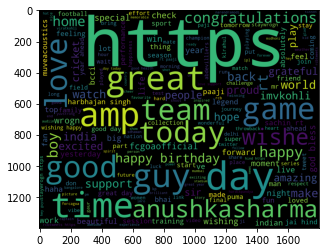

In [23]:
wordcloud_ip = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(tweet_para)

plt.imshow(wordcloud_ip)

In [25]:
# negative words  Choose path for -ve words stored in system
tweet_words = [w for w in tweet_words if not w in stopwords]
with open("../Text mining/negative-words.txt","r") as neg:
  negwords = neg.read().split("\n")

# Choosing the only words which are present in negwords
movie_neg = " ".join ([w for w in twitter_words if w in negwords])

# negative word cloud
wordcloud_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(movie_neg)

plt.imshow(wordcloud_neg)

NameError: name 'twitter_words' is not defined